<a href="https://colab.research.google.com/github/mehreengillani/Data602/blob/main/08_assignment_Mehreen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# ***Mehreen Ali Gillani***

# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

What's in this Dataset?
Rows: 8,987 Columns: 9
Each row is a
Sales of Class 1, 2, and 3 Family Homes for a Specific Neighborhood and Year.
DATA Source: https://data.cityofnewyork.us/City-Government/DOF-Summary-of-Neighborhood-Sales-by-Neighborhood-/5ebm-myj7/about_data

NYC openData summary of neighborhood sales.

Reason to choose?

I selected the NYC Department of Finance Summary of Neighborhood Sales data because, as a resident of New York City, I have a natural curiosity about the real estate market in my own neighborhood and across the different boroughs. This dataset provides a fascinating and concrete look at property price trends, allowing me to move beyond anecdotal evidence. Visualizing this data will help me better understand the economic landscape of the city and identify how sales activity and prices vary from one area to another.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/mehreengillani/Data602/refs/heads/main/DOF__Summary_of_Neighborhood_Sales_by_Neighborhood_Citywide_by_Borough_20251024.csv'
df = pd.read_csv(url)
df.head()

,BOROUGH,NEIGHBORHOOD,TYPE OF HOME,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE,YEAR
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,4,"$413,000","$492,000","$470,000","$615,000",2024
1,2,BATHGATE,03 THREE FAMILY DWELLINGS,3,"$885,000","$1,078,333.333333333","$1,175,000","$1,175,000",2024
2,2,BATHGATE,02 TWO FAMILY DWELLINGS,9,"$380,000","$656,058.7777777778","$500,000","$1,075,000",2024
3,5,WOODROW,02 TWO FAMILY DWELLINGS,27,"$200,000","$919,925.925925926","$813,000","$1,575,000",2024
4,5,WOODROW,01 ONE FAMILY DWELLINGS,45,"$405,600","$750,865.0666666667","$729,888","$2,250,000",2024


In [4]:
#check missing values
# Check for missing values
print("Missing values:")
print(df.isnull().sum())



Missing values:
BOROUGH               0
NEIGHBORHOOD          1
TYPE OF HOME          0
NUMBER OF SALES       0
LOWEST SALE PRICE     0
AVERAGE SALE PRICE    0
MEDIAN SALE PRICE     0
HIGHEST SALE PRICE    0
YEAR                  0
dtype: int64


In [6]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8987 entries, 0 to 8986
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BOROUGH             8987 non-null   object
 1   NEIGHBORHOOD        8986 non-null   object
 2   TYPE OF HOME        8987 non-null   object
 3   NUMBER OF SALES     8987 non-null   int64 
 4   LOWEST SALE PRICE   8987 non-null   object
 5   AVERAGE SALE PRICE  8987 non-null   object
 6   MEDIAN SALE PRICE   8987 non-null   object
 7   HIGHEST SALE PRICE  8987 non-null   object
 8   YEAR                8987 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 632.0+ KB


In [8]:
# Define new column names (lowercase, snake_case)
new_columns = {
    'BOROUGH': 'borough',
    'NEIGHBORHOOD': 'neighborhood',
    'TYPE OF HOME': 'home_type',
    'NUMBER OF SALES': 'sales_count',
    'LOWEST SALE PRICE': 'lowest_price',
    'AVERAGE SALE PRICE': 'avg_price',
    'MEDIAN SALE PRICE': 'median_price',
    'HIGHEST SALE PRICE': 'highest_price',
    'YEAR': 'year'
}

In [9]:
df.rename(columns=new_columns, inplace=True)
df.head(3)

,borough,neighborhood,home_type,sales_count,lowest_price,avg_price,median_price,highest_price,year
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,4,"$413,000","$492,000","$470,000","$615,000",2024
1,2,BATHGATE,03 THREE FAMILY DWELLINGS,3,"$885,000","$1,078,333.333333333","$1,175,000","$1,175,000",2024
2,2,BATHGATE,02 TWO FAMILY DWELLINGS,9,"$380,000","$656,058.7777777778","$500,000","$1,075,000",2024


In [10]:
# Step 1: Convert to lowercase
df['neighborhood'] = df['neighborhood'].str.lower()
df['home_type'] = df['home_type'].str.lower()

In [11]:
df['home_type'].value_counts()

,count
home_type,
01 one family homes,1958
02 two family homes,1927
03 three family homes,1439
01 one family dwellings,1111
02 two family dwellings,1081
03 three family dwellings,799
01-one family dwellings,227
02-two family dwellings,225
03-three family dwellings,163


In [12]:
import pandas as pd
import re

# Extract the family type (one, two, three)
df['family_type'] = df['home_type'].str.extract(r'(one|two|three)', flags=re.IGNORECASE)

# Extract the category (homes vs dwellings)
df['category'] = df['home_type'].str.extract(r'(homes|dwellings)', flags=re.IGNORECASE)

# Create a clean, standardized home_type column
def create_standard_home_type(row):
    family_type = row['family_type'].lower() if pd.notna(row['family_type']) else 'unknown'
    category = row['category'].lower() if pd.notna(row['category']) else 'dwelling'  # default to dwelling
    return f"{family_type} family {category}"

df['home_type_clean'] = df.apply(create_standard_home_type, axis=1)

print("Cleaned home types:")
print(df['home_type_clean'].value_counts())


Cleaned home types:
home_type_clean
one family homes          1981
two family homes          1945
three family homes        1455
one family dwellings      1338
two family dwellings      1306
three family dwellings     962
Name: count, dtype: int64


In [13]:
df.head(10)

,borough,neighborhood,home_type,sales_count,lowest_price,avg_price,median_price,highest_price,year,family_type,category,home_type_clean
0,2,bathgate,01 one family dwellings,4,"$413,000","$492,000","$470,000","$615,000",2024,one,dwellings,one family dwellings
1,2,bathgate,03 three family dwellings,3,"$885,000","$1,078,333.333333333","$1,175,000","$1,175,000",2024,three,dwellings,three family dwellings
2,2,bathgate,02 two family dwellings,9,"$380,000","$656,058.7777777778","$500,000","$1,075,000",2024,two,dwellings,two family dwellings
3,5,woodrow,02 two family dwellings,27,"$200,000","$919,925.925925926","$813,000","$1,575,000",2024,two,dwellings,two family dwellings
4,5,woodrow,01 one family dwellings,45,"$405,600","$750,865.0666666667","$729,888","$2,250,000",2024,one,dwellings,one family dwellings
5,5,willowbrook,02 two family dwellings,27,"$600,000","$923,868.074074074","$895,000","$1,360,000",2024,two,dwellings,two family dwellings
6,5,willowbrook,01 one family dwellings,54,"$377,500","$776,758.7037037037","$750,000","$1,580,000",2024,one,dwellings,one family dwellings
7,5,westerleigh,02 two family dwellings,34,"$480,000","$840,552.9705882353","$867,500","$1,235,000",2024,two,dwellings,two family dwellings
8,5,westerleigh,01 one family dwellings,77,"$300,000","$675,892.8441558442","$670,000","$1,303,360",2024,one,dwellings,one family dwellings
9,5,west new brighton,03 three family dwellings,1,"$775,000","$775,000","$775,000","$775,000",2024,three,dwellings,three family dwellings


In [14]:
# Based on your sample data, it looks like these might be your columns:
price_columns = ['lowest_price', 'avg_price', 'median_price', 'highest_price']

# Convert price columns to numeric, handling errors by coercing to NaN
for col in price_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')

print(df.head())

  borough neighborhood                  home_type  sales_count  lowest_price  \
0       2     bathgate    01 one family dwellings            4        413000   
1       2     bathgate  03 three family dwellings            3        885000   
2       2     bathgate    02 two family dwellings            9        380000   
3       5      woodrow    02 two family dwellings           27        200000   
4       5      woodrow    01 one family dwellings           45        405600   

      avg_price  median_price  highest_price  year family_type   category  \
0  4.920000e+05      470000.0         615000  2024         one  dwellings   
1  1.078333e+06     1175000.0        1175000  2024       three  dwellings   
2  6.560588e+05      500000.0        1075000  2024         two  dwellings   
3  9.199259e+05      813000.0        1575000  2024         two  dwellings   
4  7.508651e+05      729888.0        2250000  2024         one  dwellings   

          home_type_clean  
0    one family dwellings  


In [16]:
# Check for outliers in numeric columns
print("\nBasic statistics:")
print(df[price_columns].describe())


Basic statistics:
       lowest_price     avg_price  median_price  highest_price
count  8.987000e+03  8.987000e+03  8.987000e+03   8.987000e+03
mean   7.714482e+05  1.329673e+06  1.265663e+06   2.298167e+06
std    1.561026e+06  2.053301e+06  1.913900e+06   4.081153e+06
min    1.500000e+05  1.675000e+05  1.675000e+05   1.767500e+05
25%    2.260000e+05  5.169665e+05  5.050000e+05   8.000000e+05
50%    3.290000e+05  7.330420e+05  7.200000e+05   1.200000e+06
75%    6.100000e+05  1.132150e+06  1.085000e+06   2.131848e+06
max    3.500000e+07  3.500000e+07  3.500000e+07   8.740000e+07


In [19]:
df.borough.value_counts()

,count
borough,
BROOKLYN,2010
QUEENS,1926
STATEN ISLAND,1458
BRONX,1158
MANHATTAN,628
3,499
4,481
5,375
2,292


In [26]:
# First, let's check what data types we have in the borough column
print("Data types in borough column:")
print(df['borough'].apply(type).value_counts())

# Convert everything to string first, then replace
df['borough'] = df['borough'].astype(str)

# Update borough mapping to use strings as keys
borough_mapping = {
    '1': 'MANHATTAN',
    '2': 'BRONX',
    '3': 'BROOKLYN',
    '4': 'QUEENS',
    '5': 'STATEN ISLAND'
}

# Now replace
df['borough'] = df['borough'].replace(borough_mapping)

# Get the new count
print("\nUpdated borough counts:")
print(df['borough'].value_counts())

Data types in borough column:
borough
<class 'str'>    8987
Name: count, dtype: int64

Updated borough counts:
borough
BROOKLYN         2509
QUEENS           2407
STATEN ISLAND    1833
BRONX            1450
MANHATTAN         788
Name: count, dtype: int64


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



# Part 1 **Matplotlib**

Plot 1: Bar Plot - Average Price by Borough
This code creates a **bar chart showing the average home prices** for each borough in the dataset. It groups the data by borough, calculates the mean average price for each, and displays the results as blue bars with black edges for clear visual comparison across different boroughs.

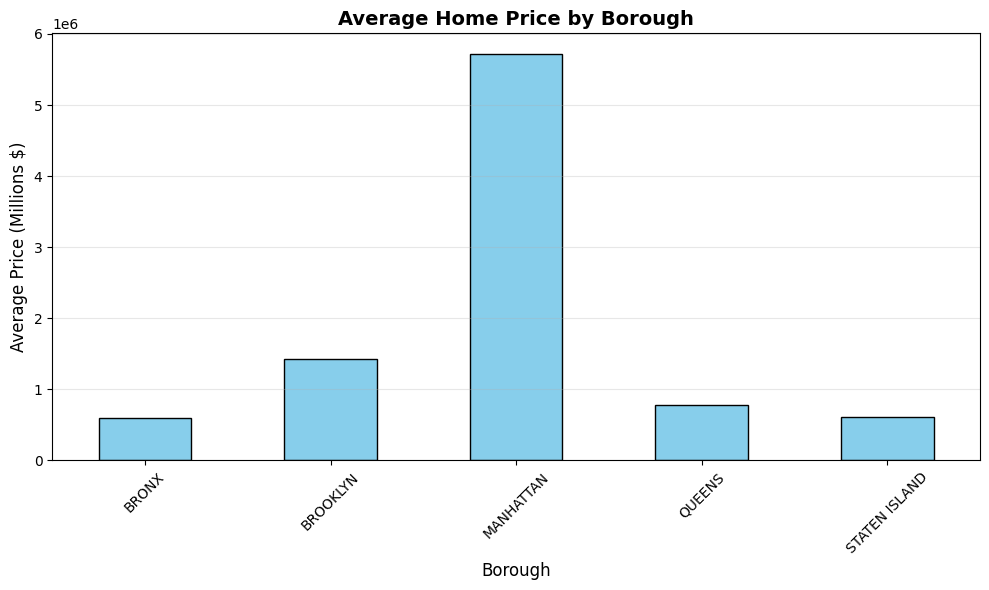

In [28]:
plt.figure(figsize=(10, 6))

# Group data by borough and calculate average price
borough_prices = df.groupby('borough')['avg_price'].mean()

# Create bar plot
borough_prices.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Home Price by Borough', fontsize=14, fontweight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Average Price (Millions $)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

This grouped bar chart shows the distribution of sales based on the type of home (one, two, or three family) and whether it was categorized as a 'home' or 'dwelling'.

<Figure size 1000x600 with 0 Axes>

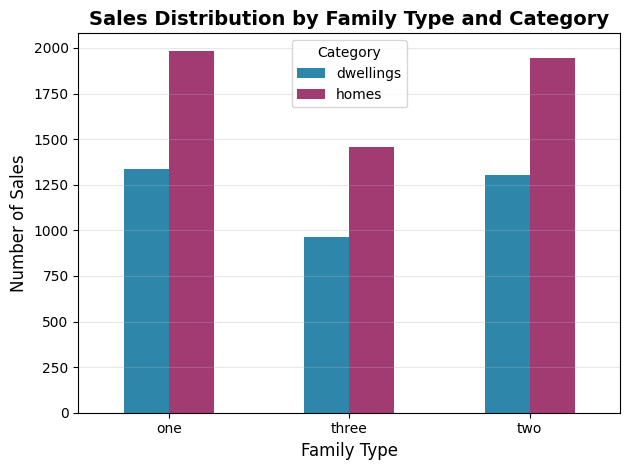

In [36]:
plt.figure(figsize=(10, 6))

# Group by family_type and category
grouped_data = df.groupby(['family_type', 'category']).size().unstack()

# Create grouped bar plot
grouped_data.plot(kind='bar', color=['#2E86AB', '#A23B72'])


plt.title('Sales Distribution by Family Type and Category', fontsize=14, fontweight='bold')
plt.xlabel('Family Type', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

This scatter plot explores the relationship between the average home price and the number of sales, with different boroughs represented by different colors to highlight potential variations.

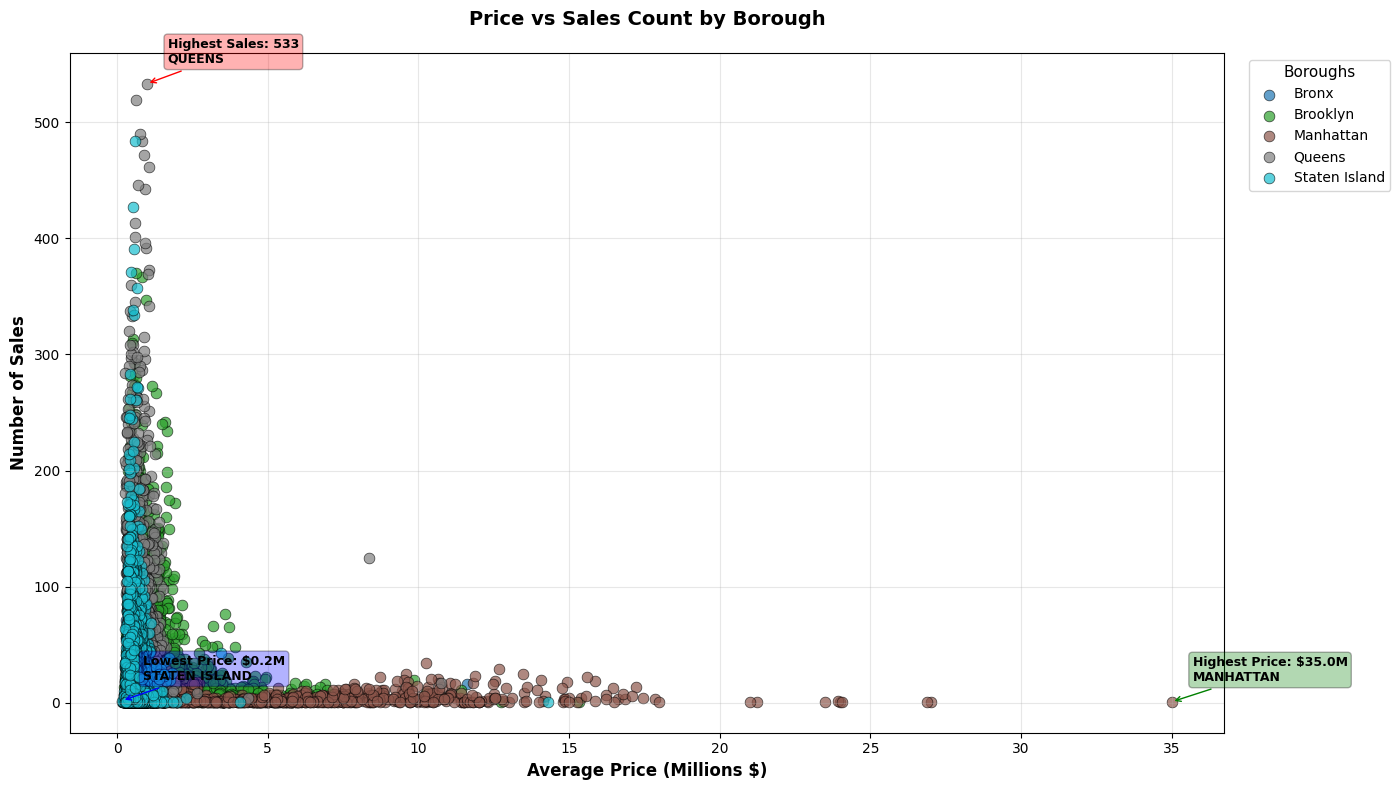

In [43]:
plt.figure(figsize=(14, 8))

# Create a color map for boroughs (they are strings like 'BRONX')
boroughs = sorted(df['borough'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(boroughs)))
color_map = dict(zip(boroughs, colors))

# Create scatter plot with explicit colors for each borough
for borough in boroughs:
    borough_data = df[df['borough'] == borough]
    plt.scatter(borough_data['avg_price']/1000000, borough_data['sales_count'],
               color=color_map[borough],
               label=borough.title(),
               alpha=0.7,
               s=60,
               marker='o',
               edgecolors='black',
               linewidth=0.5)

# Change title and labels
plt.title('Price vs Sales Count by Borough', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Average Price (Millions $)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Sales', fontsize=12, fontweight='bold')

# Modify axis text ticks/labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Highlight interesting points with annotations
max_sales = df.loc[df['sales_count'].idxmax()]
min_price = df.loc[df['avg_price'].idxmin()]
max_price = df.loc[df['avg_price'].idxmax()]

points_of_interest = [
    (max_sales, f"Highest Sales: {max_sales['sales_count']}\n{max_sales['borough']}", 'red'),
    (min_price, f"Lowest Price: ${min_price['avg_price']/1000000:.1f}M\n{min_price['borough']}", 'blue'),
    (max_price, f"Highest Price: ${max_price['avg_price']/1000000:.1f}M\n{max_price['borough']}", 'green')
]

for point, text, color in points_of_interest:
    plt.annotate(text,
                xy=(point['avg_price']/1000000, point['sales_count']),
                xytext=(15, 15), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.3),
                fontsize=9, fontweight='bold',
                arrowprops=dict(arrowstyle='->', color=color))

# Add legend with borough names
plt.legend(title='Boroughs', fontsize=10, title_fontsize=11,
           loc='upper right', bbox_to_anchor=(1.15, 1))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This line plot illustrates the average price for each family type, showing how the number of families in a home relates to its average sale price.

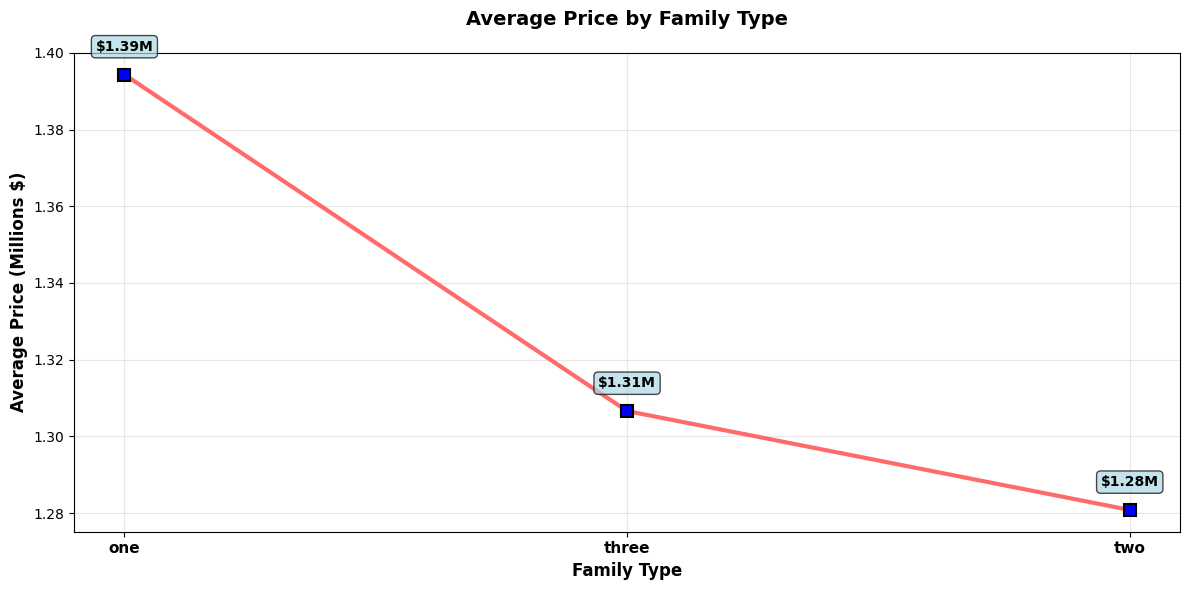

In [39]:
plt.figure(figsize=(12, 6))

# Prepare data for line plot - average prices by family type
family_prices = df.groupby('family_type')['avg_price'].mean() / 1000000

# Create line plot with customizations
plt.plot(family_prices.index, family_prices.values,
         marker='s',  # Change marker to square
         markersize=8,
         color='#FF6B6B',  # Change line color
         linewidth=3,  # Change line width
         markerfacecolor='blue',
         markeredgecolor='black',
         markeredgewidth=1.5)

# Change title and labels
plt.title('Average Price by Family Type', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Family Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Price (Millions $)', fontsize=12, fontweight='bold')

# Modify axis text ticks/labels
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)

# Add annotations for each data point
for i, (family_type, price) in enumerate(family_prices.items()):
    plt.annotate(f'${price:.2f}M',
                xy=(family_type, price),
                xytext=(0, 15), textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This multi-line plot compares the lowest, average, median, and highest sale prices across different family types, providing insight into the price range for each category.

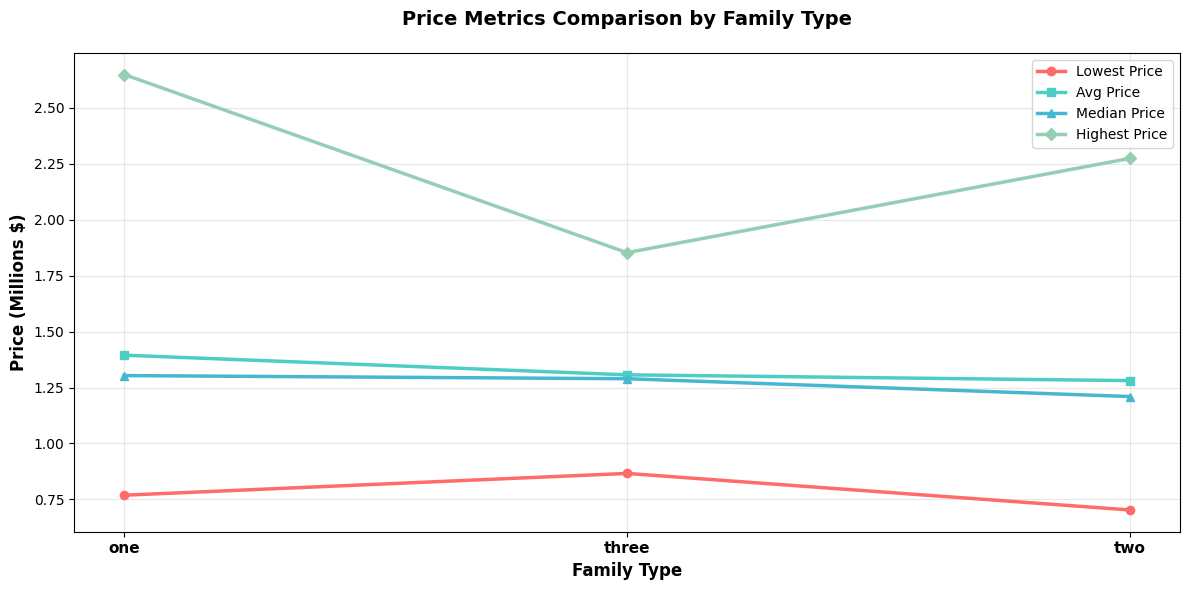

In [40]:
plt.figure(figsize=(12, 6))

# Prepare data for multiple lines
price_metrics = ['lowest_price', 'avg_price', 'median_price', 'highest_price']
family_types = df['family_type'].unique()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
markers = ['o', 's', '^', 'D']  # circle, square, triangle, diamond

for i, metric in enumerate(price_metrics):
    metric_avg = df.groupby('family_type')[metric].mean() / 1000000
    plt.plot(metric_avg.index, metric_avg.values,
             marker=markers[i],
             markersize=6,
             color=colors[i],
             linewidth=2.5,
             label=metric.replace('_', ' ').title())

# Change title and labels
plt.title('Price Metrics Comparison by Family Type', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Family Type', fontsize=12, fontweight='bold')
plt.ylabel('Price (Millions $)', fontsize=12, fontweight='bold')

# Modify axis text ticks/labels
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)

# Add legend
plt.legend(fontsize=10)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Multi-Plots with Subplots: This set of subplots presents multiple visualizations together, including average price by borough, sales count by family type, average price by category, and the relationship between price and sales count.

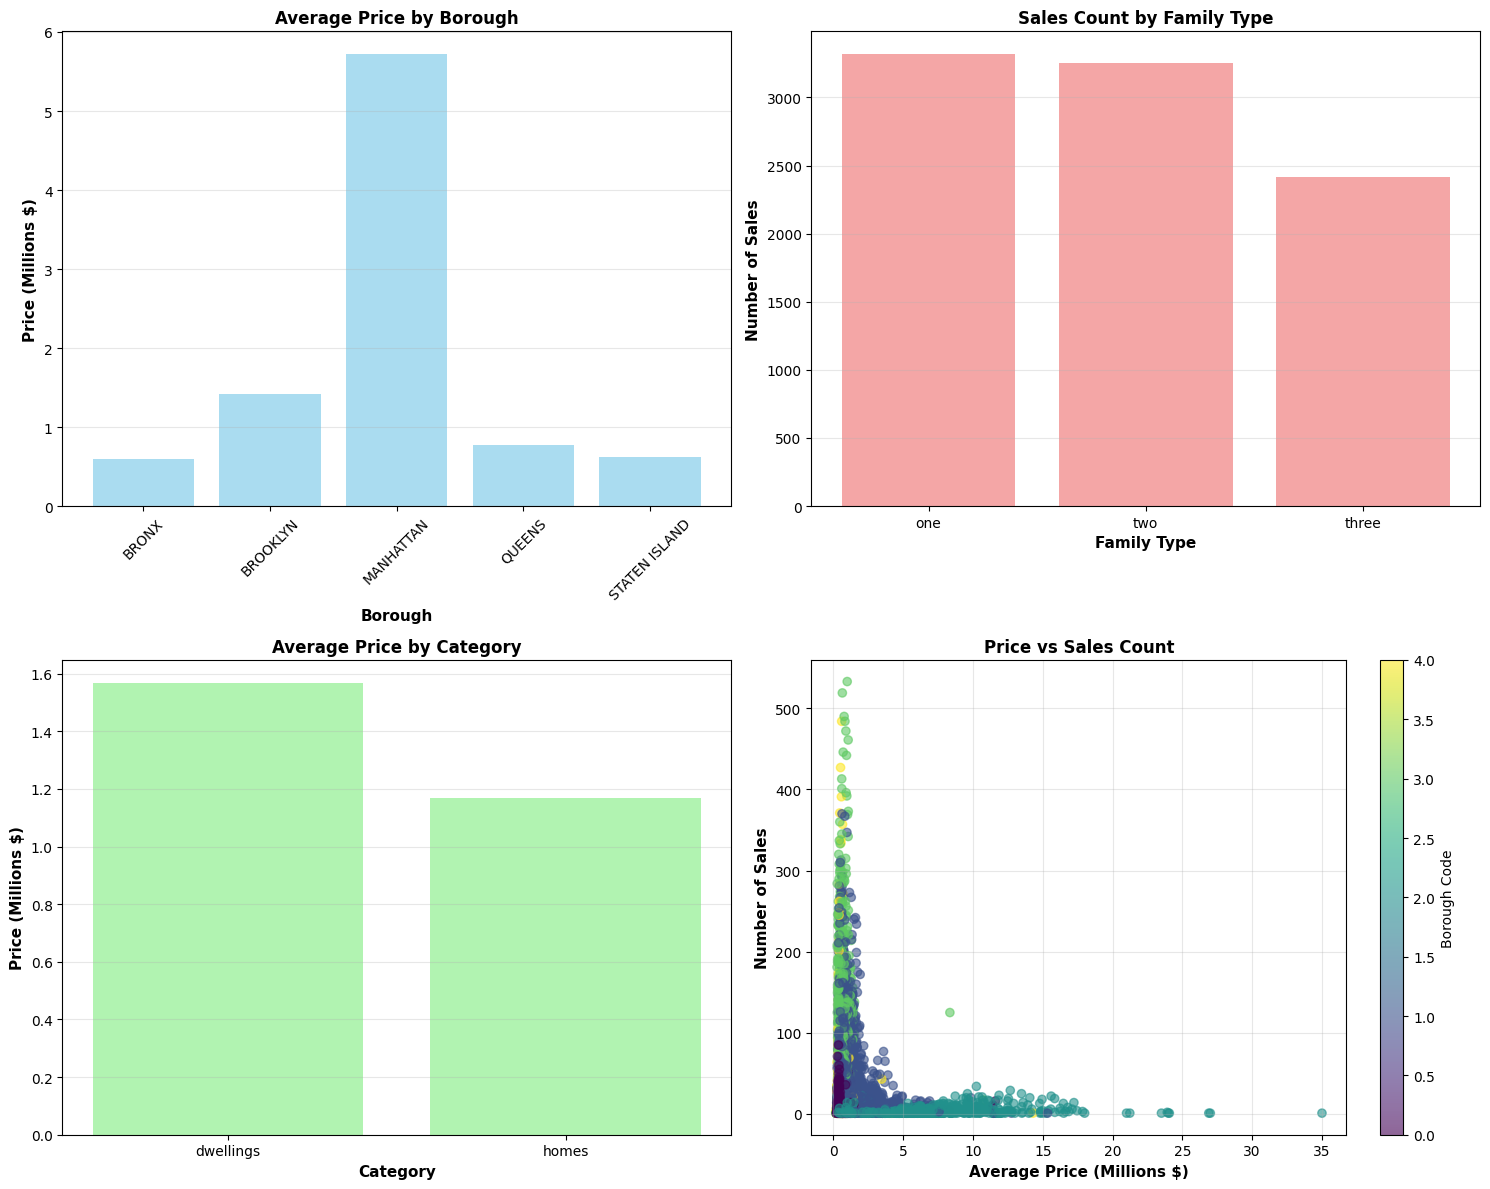

In [45]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Average Price by Borough (Bar Plot)
borough_avg = df.groupby('borough')['avg_price'].mean() / 1000000
axes[0,0].bar(borough_avg.index, borough_avg.values, color='skyblue', alpha=0.7)
axes[0,0].set_title('Average Price by Borough', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Borough', fontsize=11, fontweight='bold')  # Change axis label size
axes[0,0].set_ylabel('Price (Millions $)', fontsize=11, fontweight='bold')  # Change axis label size
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)  # Modify axis ticks
axes[0,0].tick_params(axis='y', labelsize=10)
axes[0,0].grid(axis='y', alpha=0.3)

# Plot 2: Sales Count by Family Type
family_sales = df['family_type'].value_counts()
axes[0,1].bar(family_sales.index, family_sales.values, color='lightcoral', alpha=0.7)
axes[0,1].set_title('Sales Count by Family Type', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Family Type', fontsize=11, fontweight='bold')
axes[0,1].set_ylabel('Number of Sales', fontsize=11, fontweight='bold')
axes[0,1].tick_params(axis='x', labelsize=10)
axes[0,1].tick_params(axis='y', labelsize=10)
axes[0,1].grid(axis='y', alpha=0.3)

# Plot 3: Price by Category
category_avg = df.groupby('category')['avg_price'].mean() / 1000000
axes[1,0].bar(category_avg.index, category_avg.values, color='lightgreen', alpha=0.7)
axes[1,0].set_title('Average Price by Category', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Category', fontsize=11, fontweight='bold')
axes[1,0].set_ylabel('Price (Millions $)', fontsize=11, fontweight='bold')
axes[1,0].tick_params(axis='x', labelsize=10)
axes[1,0].tick_params(axis='y', labelsize=10)
axes[1,0].grid(axis='y', alpha=0.3)

# Plot 4: Scatter Plot - Price vs Sales
scatter = axes[1,1].scatter(df['avg_price']/1000000, df['sales_count'],
                           alpha=0.6, c=df['borough'].astype('category').cat.codes, cmap='viridis')
axes[1,1].set_title('Price vs Sales Count', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Average Price (Millions $)', fontsize=11, fontweight='bold')
axes[1,1].set_ylabel('Number of Sales', fontsize=11, fontweight='bold')
axes[1,1].tick_params(axis='x', labelsize=10)
axes[1,1].tick_params(axis='y', labelsize=10)
axes[1,1].grid(alpha=0.3)

# Add colorbar for scatter plot
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('Borough Code', fontsize=10)

plt.tight_layout()
plt.show()

This histogram shows the distribution of average home prices across all properties, indicating the frequency of different price ranges in the dataset.

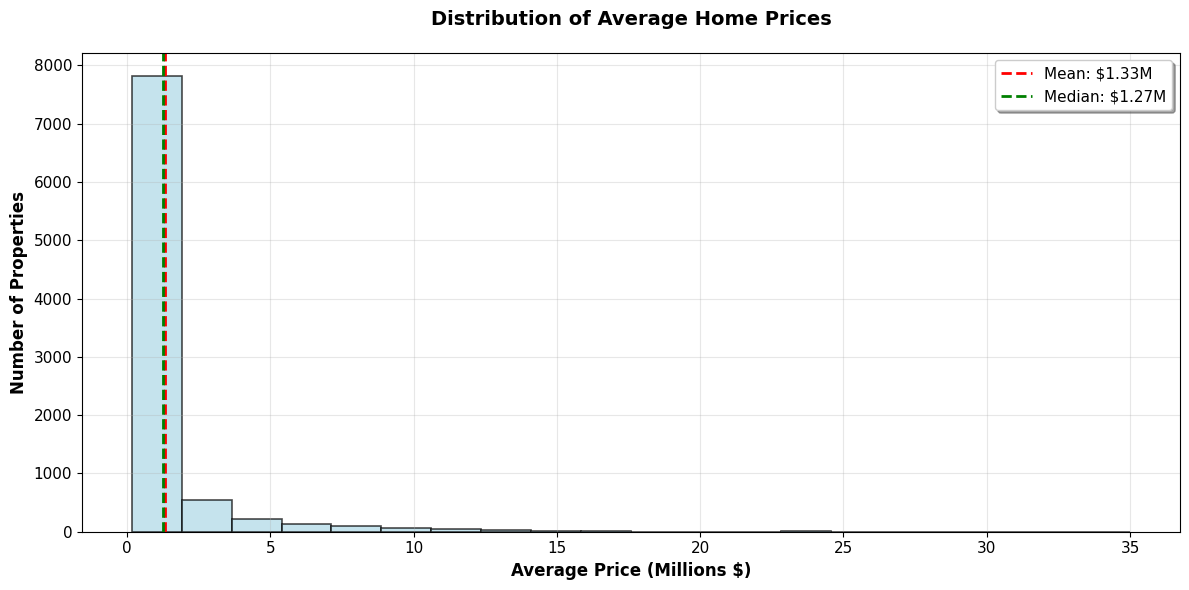

In [46]:
# Create histogram with customizations
plt.figure(figsize=(12, 6))

# Plot histogram
n, bins, patches = plt.hist(df['avg_price']/1000000, bins=20,
                           color='lightblue', alpha=0.7,
                           edgecolor='black', linewidth=1.2)

# Change title and labels with custom sizes
plt.title('Distribution of Average Home Prices', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Average Price (Millions $)', fontsize=12, fontweight='bold')  # Changed size
plt.ylabel('Number of Properties', fontsize=12, fontweight='bold')  # Changed size

# Modify axis text ticks/labels
plt.xticks(fontsize=11)  # Increased tick size
plt.yticks(fontsize=11)  # Increased tick size

# Add annotations for mean and median
mean_price = df['avg_price'].mean() / 1000000
median_price = df['median_price'].mean() / 1000000

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:.2f}M')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price:.2f}M')

# Change legend position and font size
plt.legend(loc='upper right', fontsize=11, frameon=True, fancybox=True, shadow=True)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Part 2 **Seaborn Plots**

This horizontal bar plot, created with Seaborn, illustrates the average home price for each borough, providing a clear visual comparison of price levels across different NYC areas.

/tmp/ipython-input-1373593000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='avg_price', y='borough', data=df,


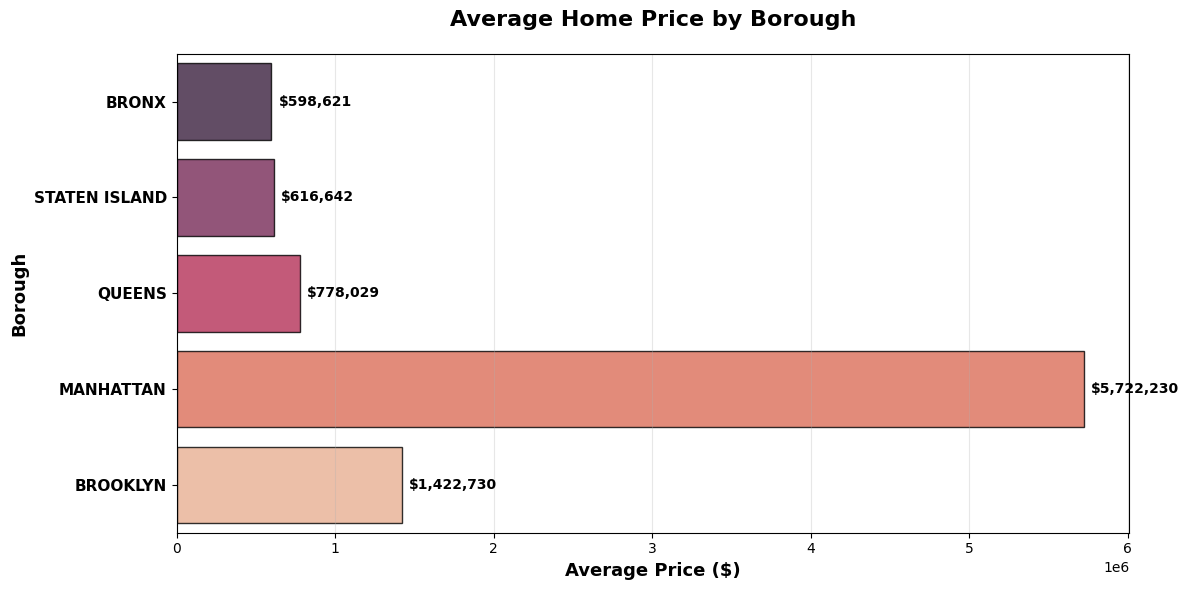

In [49]:
plt.figure(figsize=(12, 6))

# Create horizontal bar plot
ax = sns.barplot(x='avg_price', y='borough', data=df,
                 estimator='mean', errorbar=None,
                 palette='rocket', alpha=0.8,
                 edgecolor='black', linewidth=1)

# Customize the plot
plt.title('Average Home Price by Borough', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Price ($)', fontsize=13, fontweight='bold')
plt.ylabel('Borough', fontsize=13, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=10)

# Add value annotations
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.annotate(f'${width:,.0f}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                fontsize=10, fontweight='bold',
                xytext=(5, 0), textcoords='offset points')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

This grouped bar chart, created with Seaborn, shows the distribution of sales based on the type of home (one, two, or three family) and whether it was categorized as a 'home' or 'dwelling'. The 'hue' parameter is used to distinguish between 'homes' and 'dwellings'.

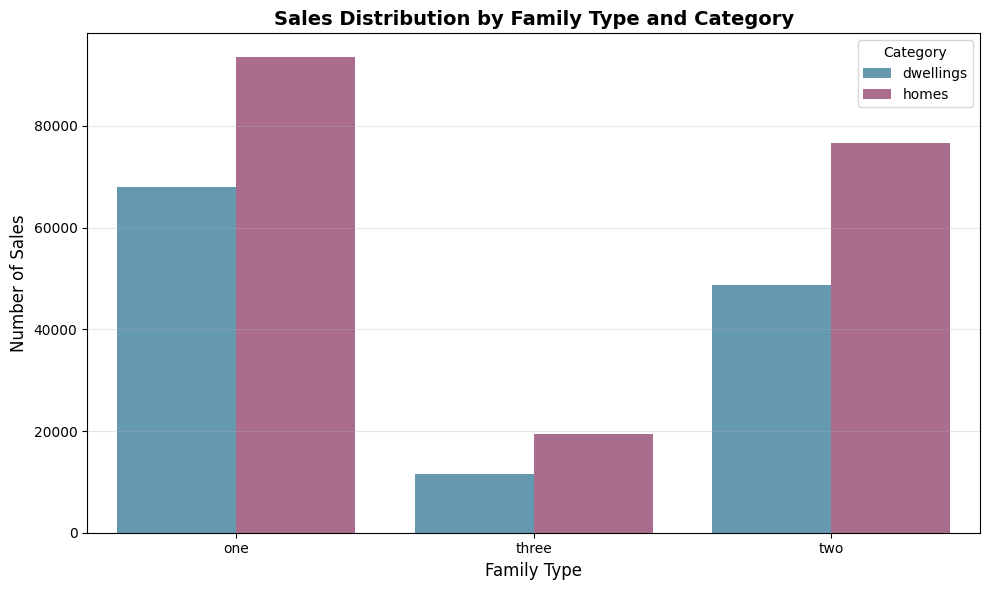

In [50]:
plt.figure(figsize=(10, 6))

# Create grouped bar plot using seaborn
sns.barplot(x='family_type', y='sales_count', hue='category', data=df,
            estimator='sum', errorbar=None,
            palette=['#2E86AB', '#A23B72'], alpha=0.8)

plt.title('Sales Distribution by Family Type and Category', fontsize=14, fontweight='bold')
plt.xlabel('Family Type', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

This scatter plot, generated using Seaborn, explores the relationship between the average home price and the number of sales. Different boroughs are automatically assigned different colors by Seaborn's 'hue' parameter to highlight variations across the city.

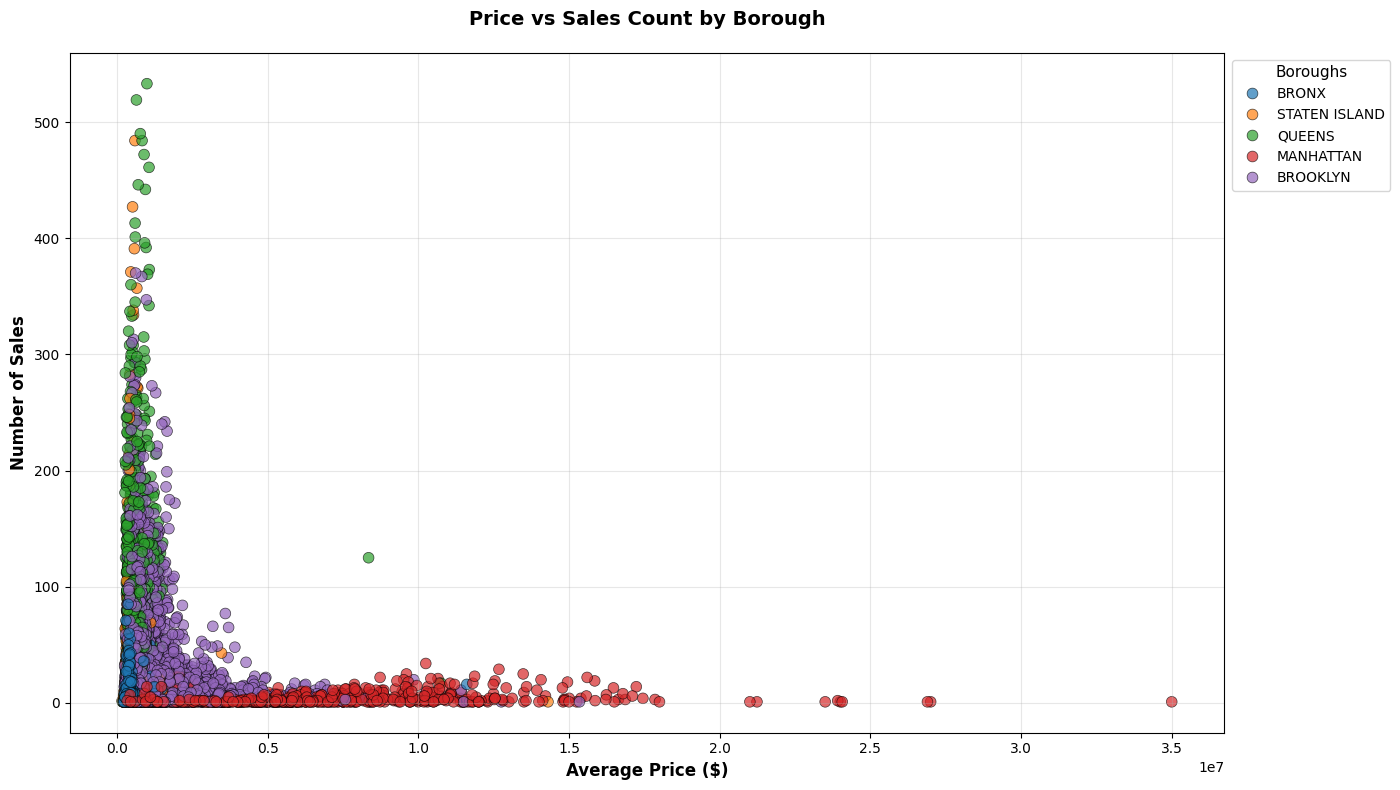

In [51]:
plt.figure(figsize=(14, 8))

# Create scatter plot using seaborn
sns.scatterplot(data=df, x='avg_price', y='sales_count', hue='borough',
                palette='tab10', alpha=0.7, s=60,
                edgecolor='black', linewidth=0.5)

plt.title('Price vs Sales Count by Borough', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Average Price ($)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Sales', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Change legend position
plt.legend(title='Boroughs', fontsize=10, title_fontsize=11,
           loc='upper right', bbox_to_anchor=(1.15, 1))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This line plot, created with Seaborn, illustrates the average price for each price metric (lowest, average, median, highest) across different family types. Seaborn's 'hue' parameter is used to differentiate the lines for each price metric.

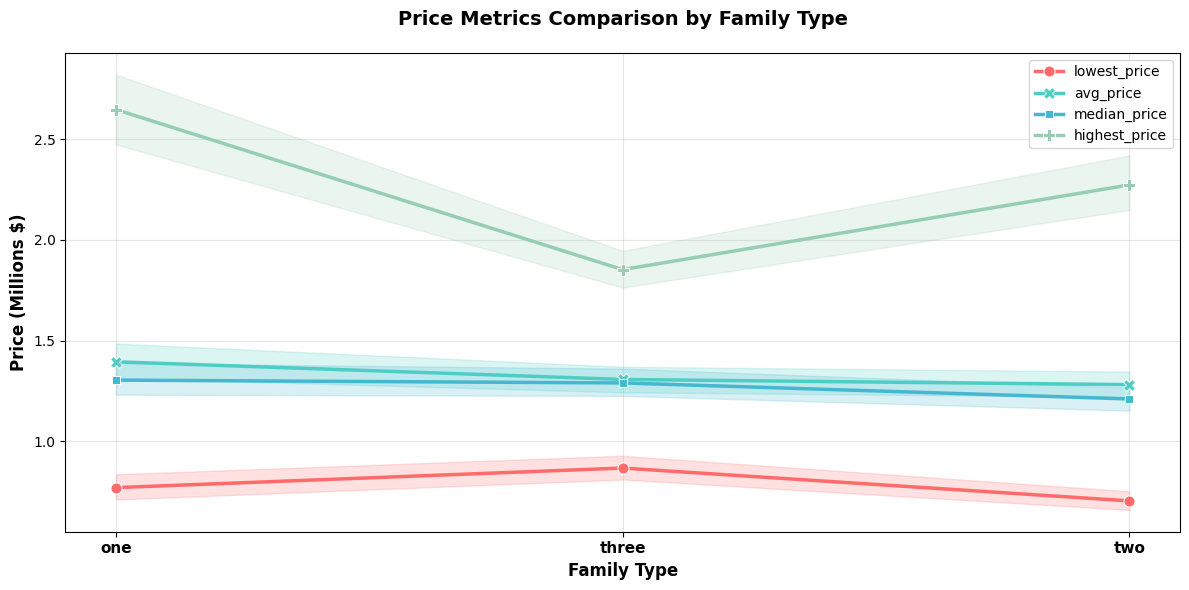

In [52]:
plt.figure(figsize=(12, 6))

# Prepare data for seaborn - melt to long format
price_metrics = ['lowest_price', 'avg_price', 'median_price', 'highest_price']
melted_df = df.melt(id_vars=['family_type'],
                    value_vars=price_metrics,
                    var_name='price_metric',
                    value_name='price_value')

# Convert to millions
melted_df['price_millions'] = melted_df['price_value'] / 1000000

# Create line plot with seaborn
sns.lineplot(data=melted_df, x='family_type', y='price_millions', hue='price_metric',
             palette=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
             markers=True, style='price_metric', dashes=False,
             markersize=8, linewidth=2.5)

plt.title('Price Metrics Comparison by Family Type', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Family Type', fontsize=12, fontweight='bold')
plt.ylabel('Price (Millions $)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This set of subplots, created with Seaborn within a Matplotlib figure, presents multiple visualizations together. It includes bar plots for average price by borough and category, a count plot for sales by family type, and a scatter plot for price vs sales count.

/tmp/ipython-input-1771408691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='borough', y='avg_price', estimator='mean',
/tmp/ipython-input-1771408691.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_yticklabels([f'${y/1000000:.1f}M' for y in y_ticks])
/tmp/ipython-input-1771408691.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='family_type', ax=axes[0,1],
/tmp/ipython-input-1771408691.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

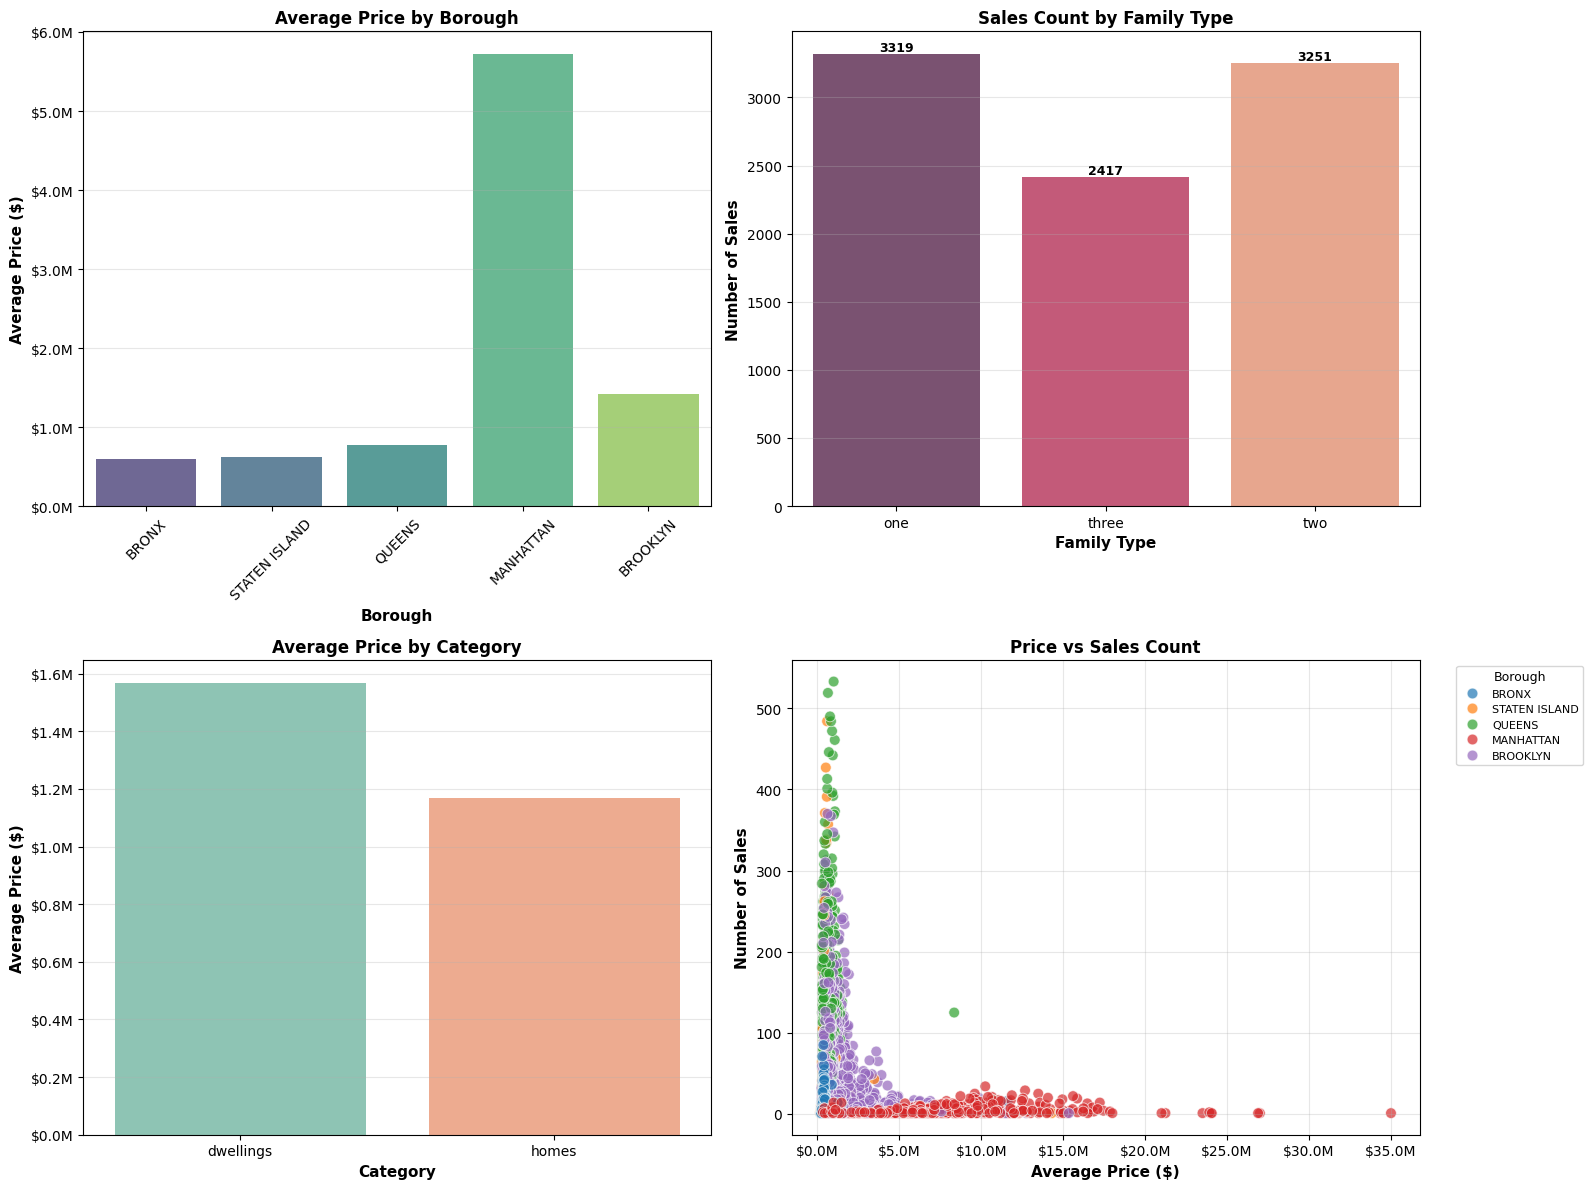

In [53]:
# Create a 2x2 subplot grid with seaborn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Average Price by Borough (Bar Plot)
sns.barplot(data=df, x='borough', y='avg_price', estimator='mean',
            errorbar=None, ax=axes[0,0], palette='viridis', alpha=0.8)
axes[0,0].set_title('Average Price by Borough', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Borough', fontsize=11, fontweight='bold')
axes[0,0].set_ylabel('Average Price ($)', fontsize=11, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,0].tick_params(axis='y', labelsize=10)
axes[0,0].grid(axis='y', alpha=0.3)

# Format y-axis to show prices in millions
y_ticks = axes[0,0].get_yticks()
axes[0,0].set_yticklabels([f'${y/1000000:.1f}M' for y in y_ticks])

# Plot 2: Sales Count by Family Type (Count Plot)
sns.countplot(data=df, x='family_type', ax=axes[0,1],
              palette='rocket', alpha=0.8)
axes[0,1].set_title('Sales Count by Family Type', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Family Type', fontsize=11, fontweight='bold')
axes[0,1].set_ylabel('Number of Sales', fontsize=11, fontweight='bold')
axes[0,1].tick_params(axis='x', labelsize=10)
axes[0,1].tick_params(axis='y', labelsize=10)
axes[0,1].grid(axis='y', alpha=0.3)

# Add value annotations on bars
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt='%.0f', fontsize=9, fontweight='bold')

# Plot 3: Price by Category (Bar Plot)
sns.barplot(data=df, x='category', y='avg_price', estimator='mean',
            errorbar=None, ax=axes[1,0], palette='Set2', alpha=0.8)
axes[1,0].set_title('Average Price by Category', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Category', fontsize=11, fontweight='bold')
axes[1,0].set_ylabel('Average Price ($)', fontsize=11, fontweight='bold')
axes[1,0].tick_params(axis='x', labelsize=10)
axes[1,0].tick_params(axis='y', labelsize=10)
axes[1,0].grid(axis='y', alpha=0.3)

# Format y-axis to show prices in millions
y_ticks = axes[1,0].get_yticks()
axes[1,0].set_yticklabels([f'${y/1000000:.1f}M' for y in y_ticks])

# Plot 4: Scatter Plot - Price vs Sales
scatter = sns.scatterplot(data=df, x='avg_price', y='sales_count', hue='borough',
                          ax=axes[1,1], palette='tab10', alpha=0.7, s=60)
axes[1,1].set_title('Price vs Sales Count', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Average Price ($)', fontsize=11, fontweight='bold')
axes[1,1].set_ylabel('Number of Sales', fontsize=11, fontweight='bold')
axes[1,1].tick_params(axis='x', labelsize=10)
axes[1,1].tick_params(axis='y', labelsize=10)
axes[1,1].grid(alpha=0.3)

# Format x-axis to show prices in millions
x_ticks = axes[1,1].get_xticks()
axes[1,1].set_xticklabels([f'${x/1000000:.1f}M' for x in x_ticks])

# Change legend position for scatter plot
axes[1,1].legend(title='Borough', title_fontsize=9, fontsize=8,
                bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This histogram, created with Seaborn, shows the distribution of average home prices across all properties. It indicates the frequency of different price ranges in the dataset and includes vertical lines to mark the mean and median prices.

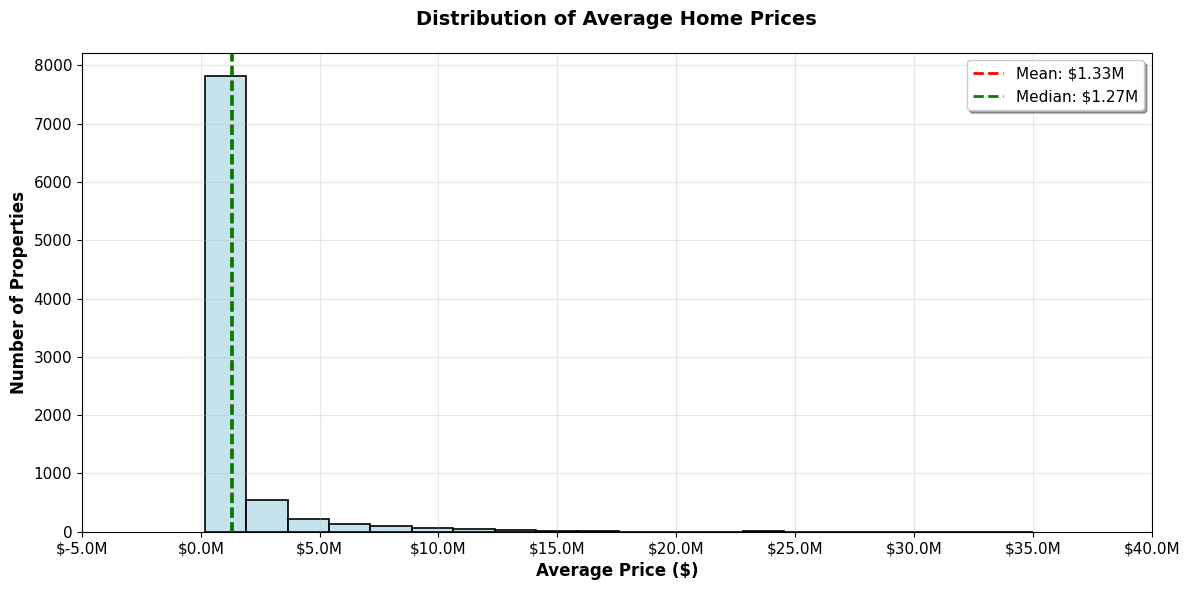

In [54]:
plt.figure(figsize=(12, 6))

# Create histogram using seaborn
sns.histplot(data=df, x='avg_price', bins=20,
             color='lightblue', alpha=0.7,
             edgecolor='black', linewidth=1.2)

# Change title and labels with custom sizes
plt.title('Distribution of Average Home Prices', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Average Price ($)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Properties', fontsize=12, fontweight='bold')

# Modify axis text ticks/labels
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Format x-axis to show millions
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, [f'${x/1000000:.1f}M' for x in x_ticks])

# Add annotations for mean and median
mean_price = df['avg_price'].mean()
median_price = df['median_price'].mean()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price/1000000:.2f}M')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price/1000000:.2f}M')

# Change legend position and font size
plt.legend(loc='upper right', fontsize=11, frameon=True, fancybox=True, shadow=True)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## **Part 3** Differences Between Matplotlib and Seaborn Based on the Plots Created

Based on the visualizations created in this notebook, here are some key differences between using Matplotlib and Seaborn:

* **Ease of Use and Aesthetics:** Seaborn generally makes it easier to create aesthetically pleasing and informative statistical graphics with less code compared to Matplotlib. Seaborn has built-in themes and color palettes that produce visually appealing plots by default. While Matplotlib provides fine-grained control over every aspect of a plot, achieving a similar level of aesthetic often requires more lines of code for customization.

* **Handling Data:** Seaborn is designed to work seamlessly with pandas DataFrames. Functions like `sns.barplot`, `sns.scatterplot`, and `sns.lineplot` directly accept DataFrame columns for x, y, and hue parameters, simplifying the plotting of relationships between variables. In contrast, Matplotlib often requires you to extract data from DataFrames into separate arrays or Series before plotting.

* **Statistical Plots:** Seaborn specializes in creating statistical visualizations. It has functions for plotting relationships between variables (`scatterplot`, `lineplot`), distributions (`histplot`), and categorical data (`barplot`, `countplot`), often with built-in aggregation and estimation capabilities (like the `estimator` parameter in `barplot`). While Matplotlib can create these plots, Seaborn's functions are specifically tailored for these tasks, often handling data aggregation and representation more conveniently.

* **Customization:** Matplotlib provides a highly flexible and powerful API for customizing plots. You have precise control over elements like titles, labels, ticks, legends, colors, markers, and line styles. Seaborn plots are built on top of Matplotlib, so you can use Matplotlib's functions (`plt.title`, `plt.xlabel`, `plt.ylabel`, `plt.legend`, etc.) to further customize Seaborn plots, as demonstrated in the code cells above. However, some basic customizations are often easier to achieve directly through Seaborn's function parameters.

* **Handling Multiple Variables (Hue):** Seaborn's `hue` parameter is very useful for visualizing the relationship between variables conditioned on a third categorical variable. This is clearly seen in the scatter plot where `hue='borough'` automatically colored points based on the borough. Achieving a similar effect in pure Matplotlib would require manually iterating through categories and plotting each subset of data with a different color and label, then managing the legend separately.

In summary, Matplotlib provides the fundamental canvas and tools for creating any type of plot with maximum flexibility. Seaborn, built on Matplotlib, offers a higher-level interface that simplifies the creation of common statistical plots, provides better default aesthetics.

*This* ***heatmap*** displays the correlation matrix of the numerical columns in the dataset, illustrating the linear relationships between different numerical variables such as sales count, various price metrics, and the year.

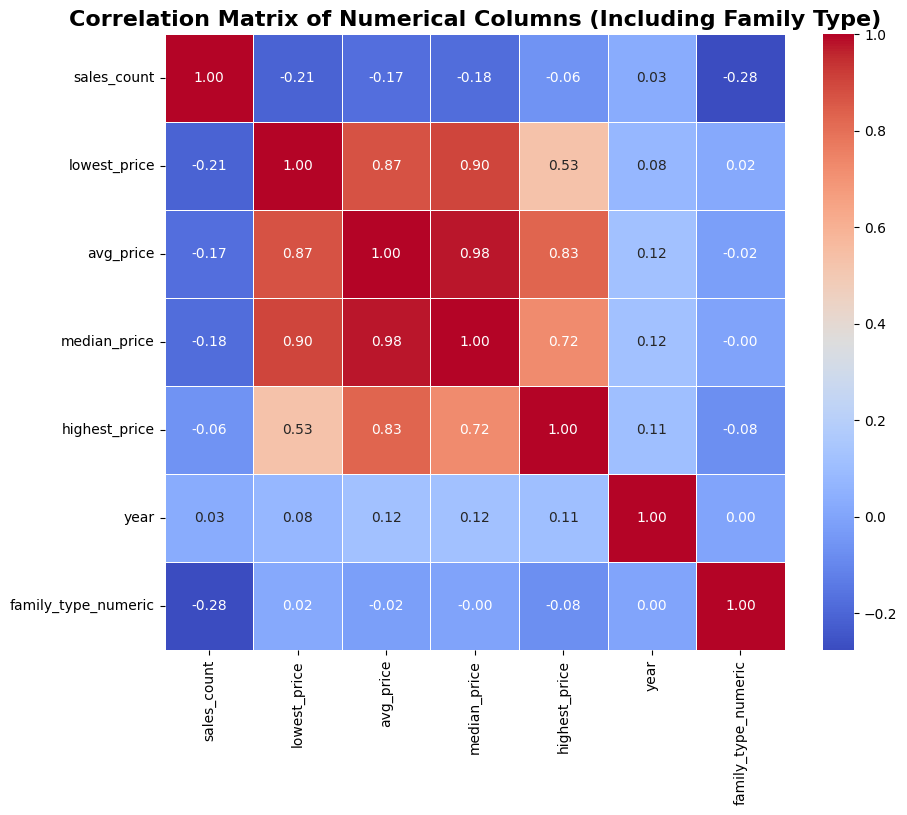

In [56]:
# Create a numerical representation of 'family_type'
family_type_mapping = {'one': 1, 'two': 2, 'three': 3}
df['family_type_numeric'] = df['family_type'].map(family_type_mapping)

# Select only numerical columns including the new one
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Numerical Columns (Including Family Type)', fontsize=16, fontweight='bold')
plt.show()

Based on the correlation matrix, here are some conclusions:

* **Price Columns Correlation**: The price-related columns (`lowest_price`, `avg_price`, `median_price`, and `highest_price`) are all highly positively correlated with each other. This is expected, as these metrics are all derived from the same sale transactions and reflect the overall price level. `avg_price` and `median_price` show a particularly strong positive correlation, which suggests that the distribution of prices in this dataset is not heavily skewed by extreme outliers (although the descriptive statistics showed some large values).

* **Sales Count Correlation**: `sales_count` shows a weak negative correlation with all price metrics. This suggests that in areas with higher average prices, the number of sales tends to be lower, and vice versa. This aligns with the intuition that more affordable areas might see higher transaction volumes.

* **Year Correlation**: The `year` column shows a weak positive correlation with the price metrics. This indicates a slight upward trend in home prices over the years included in the dataset, although the correlation is not strong. `year` has a very weak positive correlation with `sales_count`, suggesting that the number of sales has not significantly changed over the years in this dataset.

*   **Family Type Numeric** Correlation: The family_type_numeric column, which assigns a numerical value to the number of families (1 for one-family, 2 for two-family, 3 for three-family), shows a weak negative correlation with sales_count and a weak negative correlation with the price metrics. This suggests that as the number of families in a home increases (from one to three), the number of sales tends to slightly decrease, and the average, median, lowest, and highest sale prices also tend to slightly decrease. This aligns with the observation from the bar and line plots that one-family homes generally have higher prices and sales counts compared to two and three-family homes in this dataset.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

Based on the visualizations, here are some conclusions about the NYC neighborhood sales data:

* **Average Prices by Borough**: Manhattan clearly has the highest average home price, significantly exceeding the other boroughs. This aligns with the general perception of Manhattan real estate being the most expensive. Brooklyn and Queens have the next highest average prices, followed by the Bronx and Staten Island, which have similar average prices for the types of homes in this dataset.

* **Sales Distribution by Family Type and Category**: The bar plot shows the breakdown of sales by the number of families (one, two, or three) and whether the property was categorized as 'homes' or 'dwellings'. It appears there are more sales categorized as 'homes' across all family types compared to 'dwellings'. One-family homes and dwellings generally have the highest number of sales compared to two and three-family properties.

* **Price vs Sales Count by Borough**: The scatter plot reveals that while Manhattan has the highest average prices, it doesn't necessarily have the highest number of sales. Other boroughs, like Queens and Brooklyn, show instances of high sales counts, although typically at lower average prices than Manhattan. This suggests a trade-off between price and volume across different boroughs. The annotation highlights the data point with the highest number of sales, which is in Queens.

* **Average Price by Family Type**: The line plot specifically looking at average prices by family type shows a clear trend: one-family homes have the highest average price, followed by three-family, and then two-family homes. This could be influenced by factors not in the dataset, such as the size or location of these properties within neighborhoods.

* **Price Metrics Comparison by Family Type**: This multi-line plot provides a more detailed view of the price range (lowest, average, median, highest) for each family type. It reinforces that one-family homes generally command higher prices across all metrics, but also shows that the range between the lowest and highest sale prices can be quite substantial for all family types, indicating significant variation within each category.

Overall, the analysis highlights the significant price differences across NYC boroughs and provides insights into how the number of families and the category of the property relate to sales volume and price.